# Least Squares Exploration

Load crispy

In [1]:
%pylab inline --no-import-all
import glob
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import sys,os
codefolder = '../../../../crispy'
if codefolder not in sys.path: sys.path.append(codefolder)
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image
from crispy.PISCESparams import Params
codefolder = '../../../crispy'
par = Params(codefolder)
par.lamlist = np.arange(605.,730.,10)
par.filelist = [par.wavecalDir+'det'+str(wav)+'.fits' for wav in par.lamlist]
from crispy.IFS import reduceIFSMap

Populating the interactive namespace from numpy and matplotlib


In [2]:
cube = reduceIFSMap(par,par.codeRoot+"/Inputs/BB.fits",method='lstsq',smoothbad=False)


crispy - INFO - Read data from HDU 1 of ../../../crispy/Inputs/BB.fits
crispy - INFO - Reduced cube will have 11 wavelength bins
crispy - INFO - Writing data to ../../../crispy/SimResults/BB_red_lstsq.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/BB_red_lstsq_resid.fits
crispy - INFO - Writing data to ../../../crispy/SimResults/BB_red_lstsq_model.fits
crispy - INFO - Elapsed time: 4.591249s


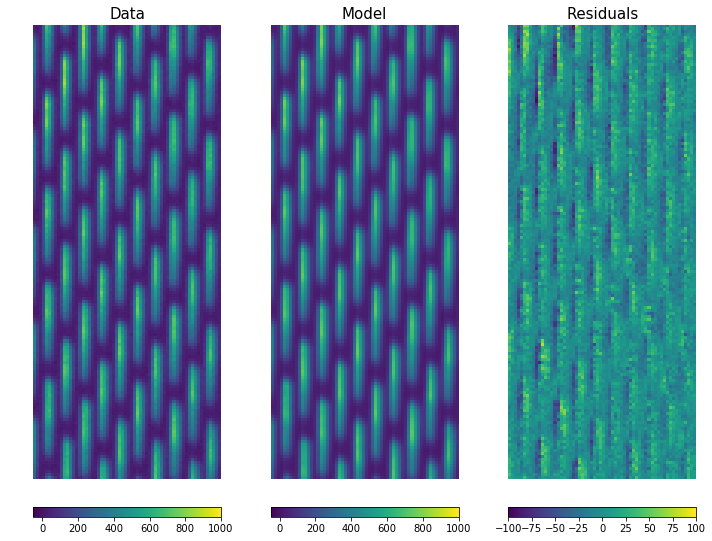

In [3]:
from astropy.io import fits
BB = fits.getdata(par.codeRoot+"/Inputs/BB.fits")
BBres = fits.getdata(par.exportDir+'/BB_red_lstsq_resid.fits')
BBmod = fits.getdata(par.exportDir+'/BB_red_lstsq_model.fits')
cmap='viridis'
ftsize = 15
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(BB[850:-120,150:300].T,vmin=-50,vmax=1000,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Data',fontsize=ftsize)
plt.subplot(132)
plt.imshow(BBmod[850:-120,150:300].T,vmin=-50,vmax=1000,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Model',fontsize=ftsize)
plt.subplot(133)
plt.imshow(BBres[850:-120,150:300].T,vmin=-100,vmax=100,cmap=cmap)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04,orientation='horizontal')
plt.title('Residuals',fontsize=ftsize)
plt.tight_layout()

(1032, 1056)


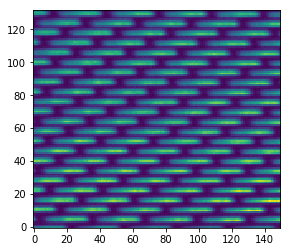

In [4]:
print BB.shape
plt.imshow(BB[850:-50,150:300])